# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [4]:
df=pd.read_csv("GOLD.csv")

In [5]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [6]:
df.shape

(512, 9)

In [7]:
df.count()

Date        512
Price       512
Open        512
High        512
Low         512
Vol.        512
Change %    512
Pred        411
new         512
dtype: int64

In [8]:
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [9]:
df_notnull=df.dropna()

In [10]:
df_notnull.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

In [11]:
df_notnull.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [12]:
x = df_notnull[['Price','Open','High','Low']]
y = df_notnull['Pred']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=30)

In [14]:
X_train.head()

,Price,Open,High,Low
195,29976,30219,30259,29950
166,29092,28890,29110,28888
244,31410,31243,31483,31177
80,29086,29001,29134,28716
383,31783,31671,31818,31619


In [15]:
y_train.head()

195     550.0
166     192.0
244     358.0
80     1177.0
383     285.0
Name: Pred, dtype: float64

In [16]:
from sklearn import linear_model

In [17]:
lg = linear_model.LinearRegression()

In [18]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lg.coef_

array([ 2.,  3., -1., -4.])

In [20]:
coefficient= pd.DataFrame(lg.coef_,x.columns,columns=['coefficient'])
coefficient

,coefficient
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [23]:
predict = lg.predict(X_test)

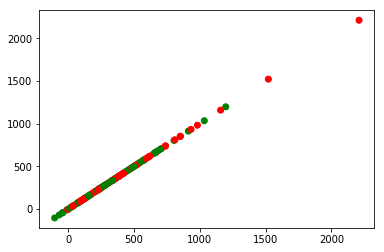

In [26]:
plt.scatter(y_test,predict,c=['g','r'])

In [27]:
df['Pred']=lg.predict(df[['Price','Open','High','Low']])

In [28]:
df.shape

(512, 9)

In [30]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


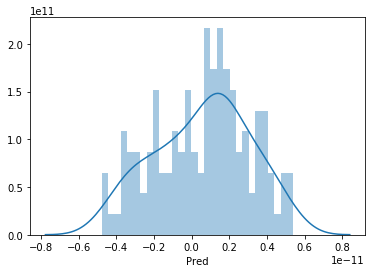

In [31]:
sn.distplot(y_test-predict,bins=30)

In [33]:
x = df_notnull[['Price','Open','High','Low']]
y = df_notnull['new']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=30)

In [36]:

X_train.head()

,Price,Open,High,Low
195,29976,30219,30259,29950
166,29092,28890,29110,28888
244,31410,31243,31483,31177
80,29086,29001,29134,28716
383,31783,31671,31818,31619


In [37]:
y_train.head()

195     66.268247
166    425.567710
244    475.286878
80     508.385848
383    312.032164
Name: new, dtype: float64

In [38]:
from sklearn import linear_model

In [39]:
lg=linear_model.LinearRegression()

In [40]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lg.coef_

array([ 1.01146732, -1.00065894,  1.00481889, -1.01566323])

In [42]:
coefficient= pd.DataFrame(lg.coef_,x.columns,columns=['coefficient'])
coefficient

,coefficient
Price,1.011467
Open,-1.000659
High,1.004819
Low,-1.015663


In [43]:
predict = lg.predict(X_test)

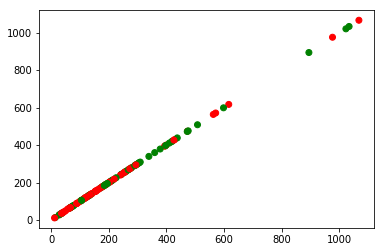

In [44]:
plt.scatter(y_test,predict,c=['g','r'])

In [45]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


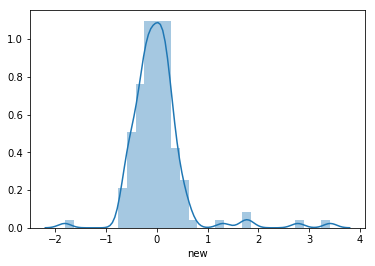

In [46]:
sn.distplot(y_test-predict,bins=30)

In [ ]:
query 2

In [33]:
import pandas as pd
import statsmodels.api as sn

PNB =pd.read_csv("PNB.csv")
PNB=PNB[PNB.Series=='EQ']
PNB.index=LT.Date
nifty=pd.read_csv("Nifty50.csv")
nifty.index=nifty.Date
prices = pd.concat([LT['Close Price'],nifty['Close']],axis=1)
prices.columns = ['PNB','nifty']
print(prices.head())

pctchange=prices.pct_change()
pctchange=pctchange.dropna(axis=0)
pctchange.head()

              PNB    nifty
Date                      
15-May-17  166.80  9445.40
16-May-17  174.15  9512.25
17-May-17  165.05  9525.75
18-May-17  158.50  9429.45
19-May-17  155.20  9427.90


,PNB,nifty
Date,,
16-May-17,0.044065,0.007078
17-May-17,-0.052254,0.001419
18-May-17,-0.039685,-0.010109
19-May-17,-0.020820,-0.000164
22-May-17,-0.027384,0.001098


In [8]:
pctchange=pctchange.iloc[-60:,:]

In [9]:
pctchange

,PNB,nifty
Date,,
11-Feb-19,-0.004916,-0.005007
12-Feb-19,0.007057,-0.005271
13-Feb-19,-0.026629,-0.003485
14-Feb-19,0.040317,-0.004410
15-Feb-19,-0.030450,-0.002015
18-Feb-19,-0.014989,-0.007781
19-Feb-19,0.013768,-0.003440
20-Feb-19,0.016440,0.012363
21-Feb-19,0.028833,0.005067


In [10]:
x=pctchange['nifty']
y=pctchange['PNB']
x1=sn.add_constant(x)
model = sn.OLS(y,x1)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    PNB   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     27.21
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.55e-06
Time:                        02:09:43   Log-Likelihood:                 147.98
No. Observations:                  60   AIC:                            -292.0
Df Residuals:                      58   BIC:                            -287.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.003      0.564      0.5

In [11]:
prices['month']=prices.index.str.slice(3)



In [12]:
prices.month

Date
15-May-17    May-17
16-May-17    May-17
17-May-17    May-17
18-May-17    May-17
19-May-17    May-17
22-May-17    May-17
23-May-17    May-17
24-May-17    May-17
25-May-17    May-17
26-May-17    May-17
29-May-17    May-17
30-May-17    May-17
31-May-17    May-17
01-Jun-17    Jun-17
02-Jun-17    Jun-17
05-Jun-17    Jun-17
06-Jun-17    Jun-17
07-Jun-17    Jun-17
08-Jun-17    Jun-17
09-Jun-17    Jun-17
12-Jun-17    Jun-17
13-Jun-17    Jun-17
14-Jun-17    Jun-17
15-Jun-17    Jun-17
16-Jun-17    Jun-17
19-Jun-17    Jun-17
20-Jun-17    Jun-17
21-Jun-17    Jun-17
22-Jun-17    Jun-17
23-Jun-17    Jun-17
              ...  
27-Mar-19    Mar-19
28-Mar-19    Mar-19
29-Mar-19    Mar-19
01-Apr-19    Apr-19
02-Apr-19    Apr-19
03-Apr-19    Apr-19
04-Apr-19    Apr-19
05-Apr-19    Apr-19
08-Apr-19    Apr-19
09-Apr-19    Apr-19
10-Apr-19    Apr-19
11-Apr-19    Apr-19
12-Apr-19    Apr-19
15-Apr-19    Apr-19
16-Apr-19    Apr-19
18-Apr-19    Apr-19
22-Apr-19    Apr-19
23-Apr-19    Apr-19
24-Apr-19    Ap

In [15]:
month=np.zeros((25,2),dtype =float)
for i,j in enumerate (prices.month.unique()):
    temp = prices[prices.month==j]
    month[i]=temp.iloc[-1,0:2]

In [16]:
month

array([[  150.5 ,  9621.25],
       [  137.3 ,  9520.9 ],
       [  162.3 , 10077.1 ],
       [  143.8 ,  9917.9 ],
       [  129.05,  9788.6 ],
       [  197.15, 10335.3 ],
       [  176.1 , 10226.55],
       [  171.4 , 10530.7 ],
       [  171.35, 11027.7 ],
       [  101.4 , 10492.85],
       [   95.3 , 10113.7 ],
       [   95.4 , 10739.35],
       [   83.65, 10736.15],
       [   76.15, 10714.3 ],
       [   85.1 , 11356.5 ],
       [   88.15, 11680.5 ],
       [   59.7 , 10930.45],
       [   73.65, 10386.6 ],
       [   69.9 , 10876.75],
       [   78.1 , 10862.55],
       [   77.5 , 10830.95],
       [   72.3 , 10792.5 ],
       [   95.5 , 11623.9 ],
       [   84.9 , 11748.15],
       [   79.8 , 11148.2 ]])

In [17]:
month=pd.DataFrame(month)

In [20]:
month.columns=['PNB','Nifty']
month.index=prices['month'].unique()

In [21]:
month

,PNB,Nifty
May-17,150.50,9621.25
Jun-17,137.30,9520.90
Jul-17,162.30,10077.10
Aug-17,143.80,9917.90
Sep-17,129.05,9788.60
Oct-17,197.15,10335.30
Nov-17,176.10,10226.55
Dec-17,171.40,10530.70
Jan-18,171.35,11027.70
Feb-18,101.40,10492.85


In [28]:
pctcng=month.pct_change()
pctcng = pctcng.dropna(axis=0)


In [34]:
x=pctcng['Nifty']
y=pctcng['PNB']
x1=sn.add_constant(x)
model = sn.OLS(y,x1)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    PNB   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.51
Date:                Sat, 07 Sep 2019   Prob (F-statistic):            0.00185
Time:                        02:25:35   Log-Likelihood:                 11.289
No. Observations:                  24   AIC:                            -18.58
Df Residuals:                      22   BIC:                            -16.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0282      0.033     -0.863      0.3